In [1]:
import pandas as pd

zip_sea = pd.read_csv('inputs/zip_sea.csv')

In [2]:
print(zip_sea)

          Zip  Coastal/Inland  Pair     Date     Price  \
0     36576.0               0     1  2010-01       NaN   
1     36532.0               1     1  2010-01  278900.0   
2     36605.0               1     2  2010-01       NaN   
3     36606.0               0     2  2010-01       NaN   
4     99501.0               1     3  2010-01  256500.0   
...       ...             ...   ...      ...       ...   
7063  28467.0               0    36  2017-09  215900.0   
7064  23502.0               0    37  2017-09  185000.0   
7065  23518.0               1    37  2017-09  225000.0   
7066  23666.0               0    38  2017-09  189900.0   
7067  23661.0               1    38  2017-09  139900.0   

      TotalWeightedObservations  GMSL_noGIA  StdDevGMSL_noGIA  \
0                     336505.31         8.3             84.67   
1                     336505.31         8.3             84.67   
2                     336505.31         8.3             84.67   
3                     336505.31         8.3

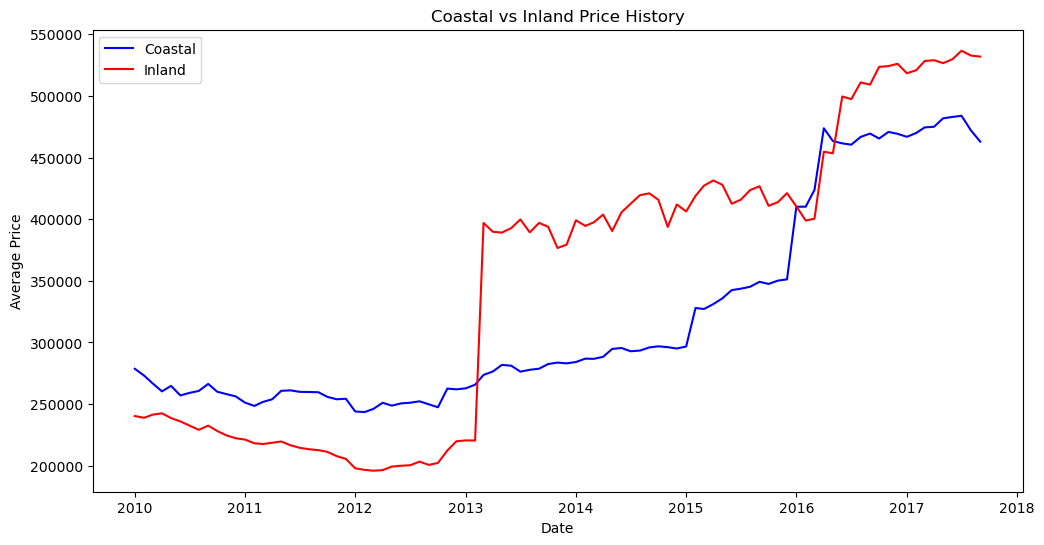

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is called zip_sea
zip_sea['Date'] = pd.to_datetime(zip_sea['Date'])

# Calculate the average price for coastal and inland areas for each date
average_prices = zip_sea.groupby(['Date', 'Coastal/Inland'])['Price'].mean().reset_index()

# Separate coastal and inland data
coastal_prices = average_prices[average_prices['Coastal/Inland'] == 1]
inland_prices = average_prices[average_prices['Coastal/Inland'] == 0]

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(coastal_prices['Date'], coastal_prices['Price'], label='Coastal', color='blue')
plt.plot(inland_prices['Date'], inland_prices['Price'], label='Inland', color='red')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Coastal vs Inland Price History')
plt.legend()

# Show the plot
plt.show()

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Assuming your DataFrame is called zip_sea
# Drop rows with missing price values
zip_sea = zip_sea.dropna(subset=['Price'])

# Perform the linear regression using scikit-learn
X = zip_sea['Coastal/Inland'].values.reshape(-1, 1)
y = zip_sea['Price']

model = LinearRegression()
model.fit(X, y)
summary(model)

# Print the model coefficients
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])

# Create a scatter plot with the fitted line
plt.figure(figsize=(8, 6))
plt.scatter(zip_sea['Coastal/Inland'], zip_sea['Price'], alpha=0.5)
plt.xlabel('Coastal/Inland')
plt.ylabel('Price')
plt.title('Price vs Coastal/Inland')

# Plot the fitted line
x_line = np.linspace(0, 1, 2)
y_line = model.intercept_ + model.coef_[0] * x_line
plt.plot(x_line, y_line, color='red', linewidth=2)

plt.show()

NameError: name 'summary' is not defined

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     845.5
Date:                Tue, 02 May 2023   Prob (F-statistic):               0.00
Time:                        13:58:30   Log-Likelihood:                -63940.
No. Observations:                4739   AIC:                         1.280e+05
Df Residuals:                    4699   BIC:                         1.282e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.379e+07   2.56e+06     -5.

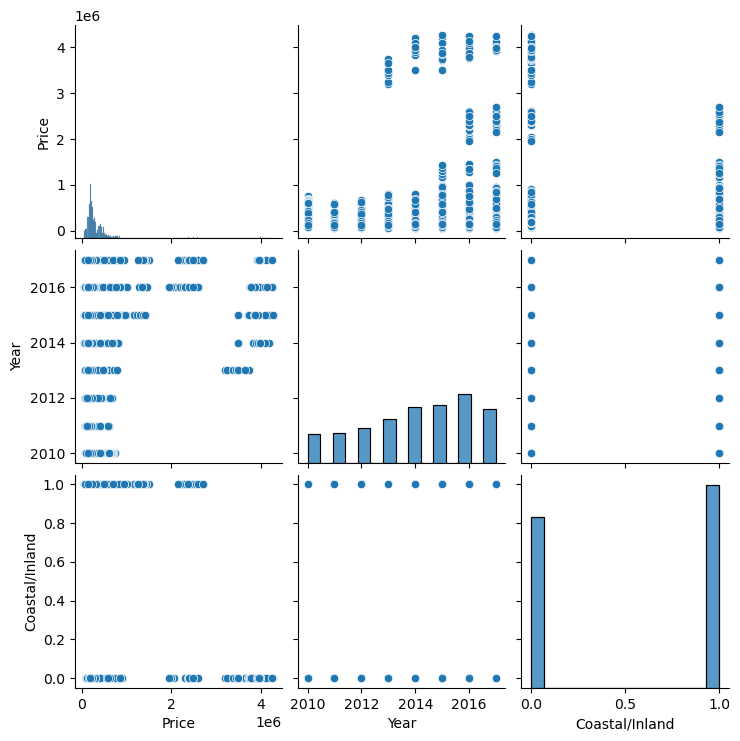

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Assuming your DataFrame is called zip_sea
# Drop rows with missing price values
zip_sea = zip_sea.dropna(subset=['Price'])

# Extract year from the date column
zip_sea['Year'] = pd.DatetimeIndex(zip_sea['Date']).year

# Create dummy variables for the Pair column
pair_dummies = pd.get_dummies(zip_sea['Pair'], prefix='Pair', drop_first=True)
zip_sea = pd.concat([zip_sea, pair_dummies], axis=1)

# Perform the multiple linear regression
X = zip_sea[['Year', 'Coastal/Inland'] + list(pair_dummies.columns)]
X = sm.add_constant(X)
y = zip_sea['Price']

model = sm.OLS(y, X).fit()
print(model.summary())

# Create a scatter plot matrix to visualize relationships between variables
sns.pairplot(zip_sea[['Price', 'Year', 'Coastal/Inland']])
plt.show()